
**Project Description**
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv



In [113]:
# Import the Libraries

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [114]:
# Read the dataset and capture it in DataFrame

df_raw_titanic= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

df_raw_titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [115]:
# Column Info
df_raw_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**NON GRAPHICAL ANALYSIS**

In [116]:
# Check Rows & Columns

df_raw_titanic.shape

(891, 12)

891: Rows & 12 Columns

1 column target , 11 independent variables

In [117]:
# Check null values

df_raw_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Embarked & Cabin has null values

Name, Sex , Ticket, cabin, Embarked are object type

Survived, Pclass, Sibsp, Parch are integer

Age, Fare are float

<Axes: >

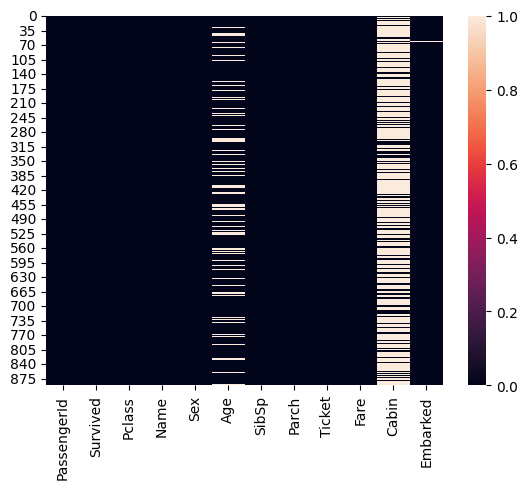

In [118]:
# Visualizing null values using heat map
sns.heatmap(df_raw_titanic.isnull())

**Null values are present in Age & cabin columns**

In [119]:
# Finding the number of unique values in a column

for index in df_raw_titanic.columns.to_list():

  print(index,':', df_raw_titanic[index].nunique())

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


**Observations**

*   Passenger ID, name, ticket ID has 891 unique values and is just ID, name doesnot have any impact on target label & can be dropped

*   Survived: categorical target Label needs to be encoded

* Pclass, Sex, SibSp, Parch, Embarked : categorical column needs to be encoded

* Age, fare are numeric non categorical columns

* Cabin is also dropped as it is a number & also has lots of null values


Dropping PassengerID & Name,as they have no effect on survivor (target label)

In [120]:
# Drop unwanted Columns

df_raw_titanic.drop(['PassengerId','Name','Ticket','Cabin'], inplace = True, axis =1)

In [121]:
# Check the sample after dropping the data

df_raw_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
665,0,2,male,32.0,2,0,73.5000,S
702,0,3,female,18.0,0,1,14.4542,C
463,0,2,male,48.0,0,0,13.0000,S
53,1,2,female,29.0,1,0,26.0000,S
834,0,3,male,18.0,0,0,8.3000,S


In [122]:
# Check for null values

df_raw_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Age has few null values, replacing null values with median

In [123]:
# Replace Null Values with Mean

df_raw_titanic['Age'] = df_raw_titanic['Age'].fillna(df_raw_titanic['Age'].mean())

df_raw_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Null values have been handled by median

<Axes: >

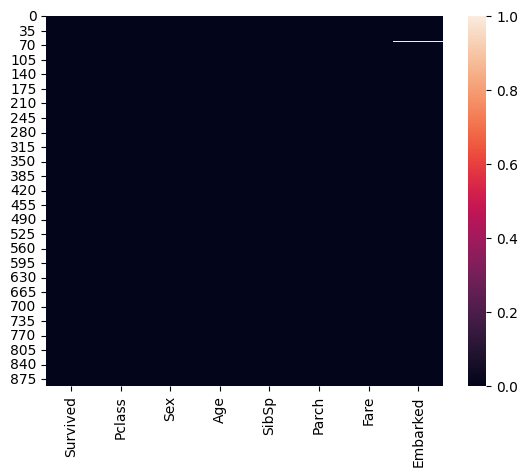

In [124]:
# Visualizing null values again using heat map

sns.heatmap(df_raw_titanic.isnull())

In [125]:
# Check description of Columns

df_raw_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# GRAPHICAL ANALYSIS

**UNIVARIATE ANALYSIS**

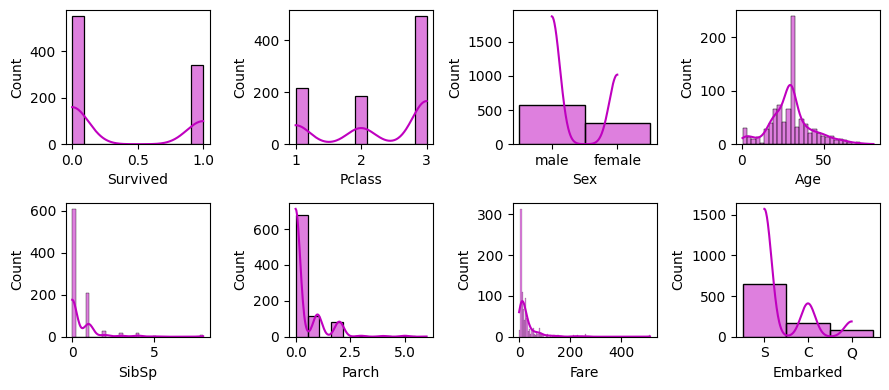

In [127]:
# Check distribution in Histplot

mp.figure(figsize=(9,4))
pnum = 1

for index in df_raw_titanic.columns.to_list():
  if(pnum<=8):
    ax = mp.subplot(2,4, pnum)
    sns.histplot(df_raw_titanic[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

From histplot it is clear that:

*   Survived is categorical target label with 2 values.

*   Pclass, Sex, SibSp, Parch, Embarked : Categorical variables.

*   Sex & Embarked needs to be encoded, remaining dont need to be encoded.

In [128]:
# Encode the dataset wherever needed using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_raw_titanic['Sex'] = le.fit_transform(df_raw_titanic['Sex'])
df_raw_titanic['Embarked'] = le.fit_transform(df_raw_titanic['Embarked'])

df_raw_titanic.head(3)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


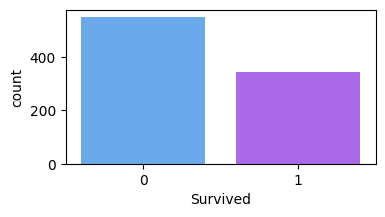

0    549
1    342
Name: Survived, dtype: int64


In [129]:
# Check Countplot to analyze balanced or imbalanced data

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw_titanic['Survived'], palette = 'cool')
mp.show()

print(df_raw_titanic['Survived'].value_counts())

Imbalanced Data in favor of Survived =0

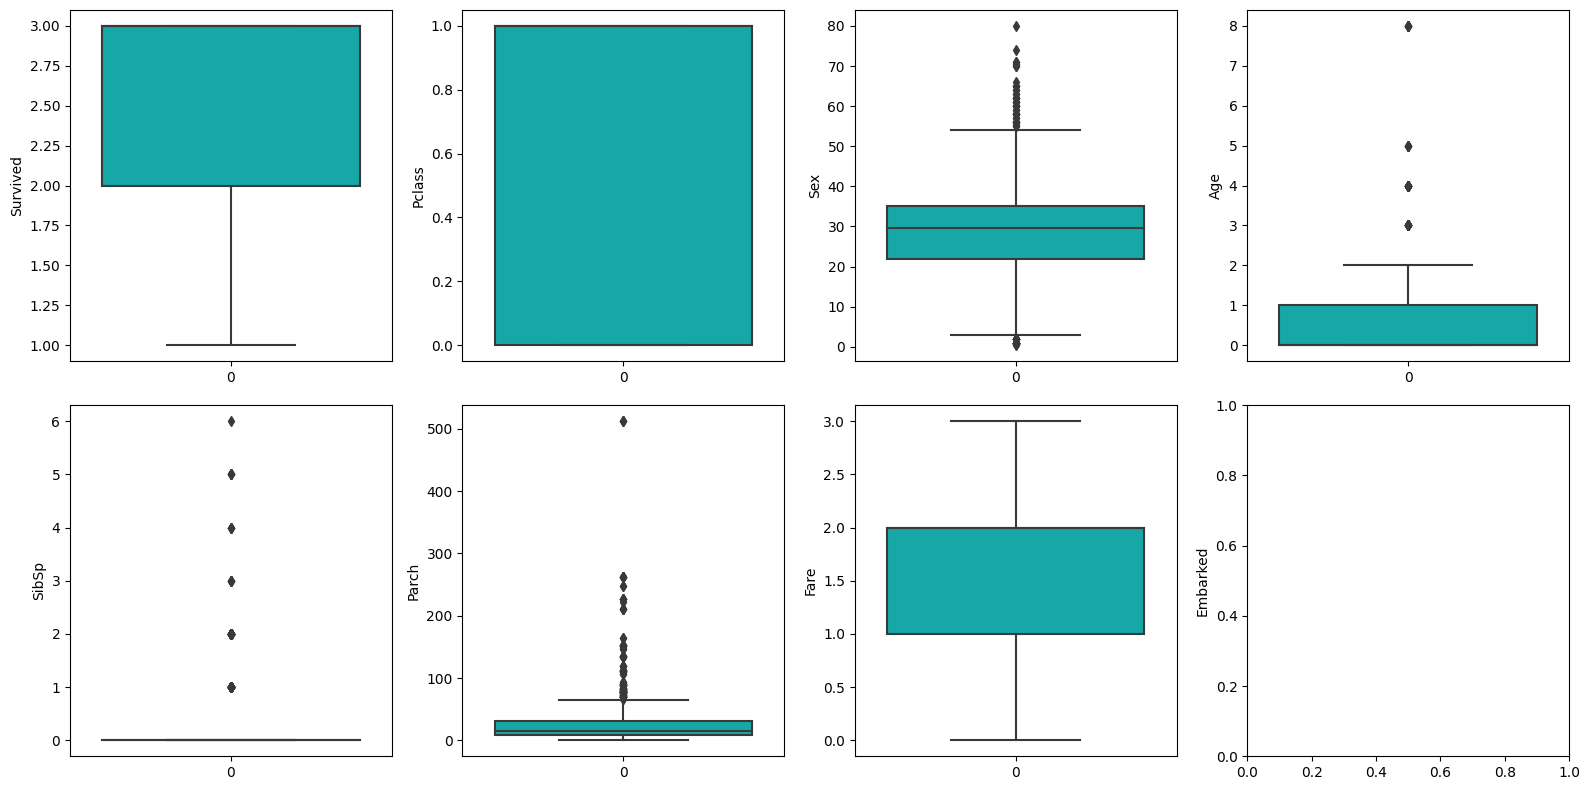

In [130]:
# Box plot analysis to viualize outliers

mp.figure(figsize=(16,8))
pnum = 1

for index in df_raw_titanic.columns.to_list():
  if(pnum<=8):
    sns.boxplot(df_raw_titanic[index], color = 'c')
    ax = mp.subplot(2,4,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

Few outliers in age & few in Parch

**Bivariate Analysis**

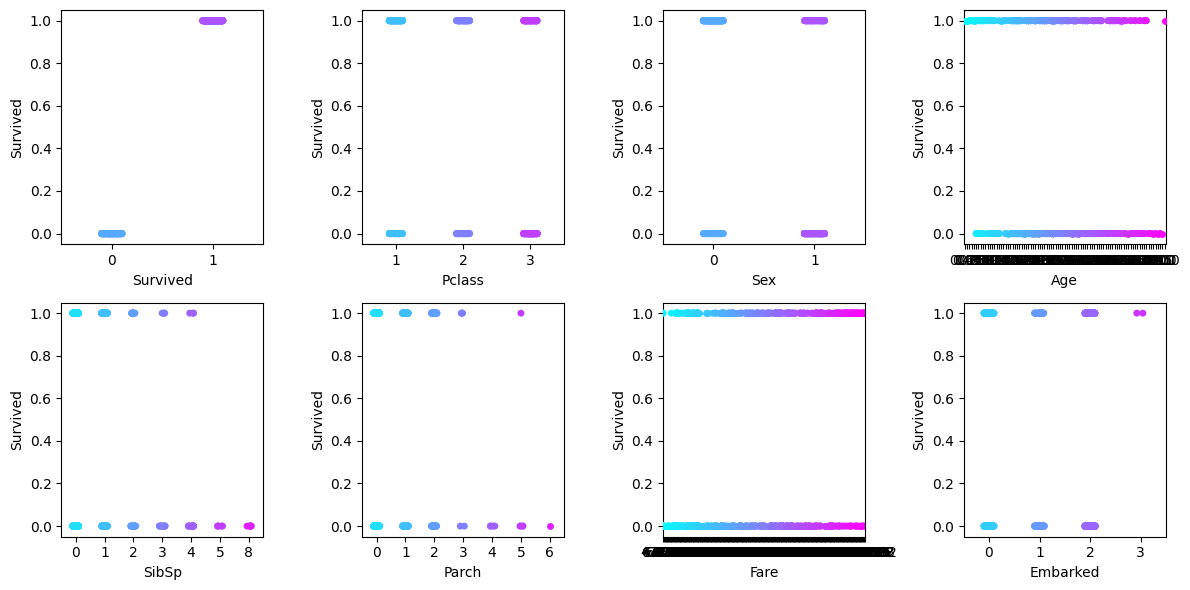

In [131]:
mp.figure(figsize=(12,6))
pnum = 1

for index in df_raw_titanic.columns.to_list():
  if(pnum<=8):
    ax = mp.subplot(2,4, pnum)
    sns.stripplot(x=df_raw_titanic[index], y =df_raw_titanic['Survived'], palette = 'cool')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

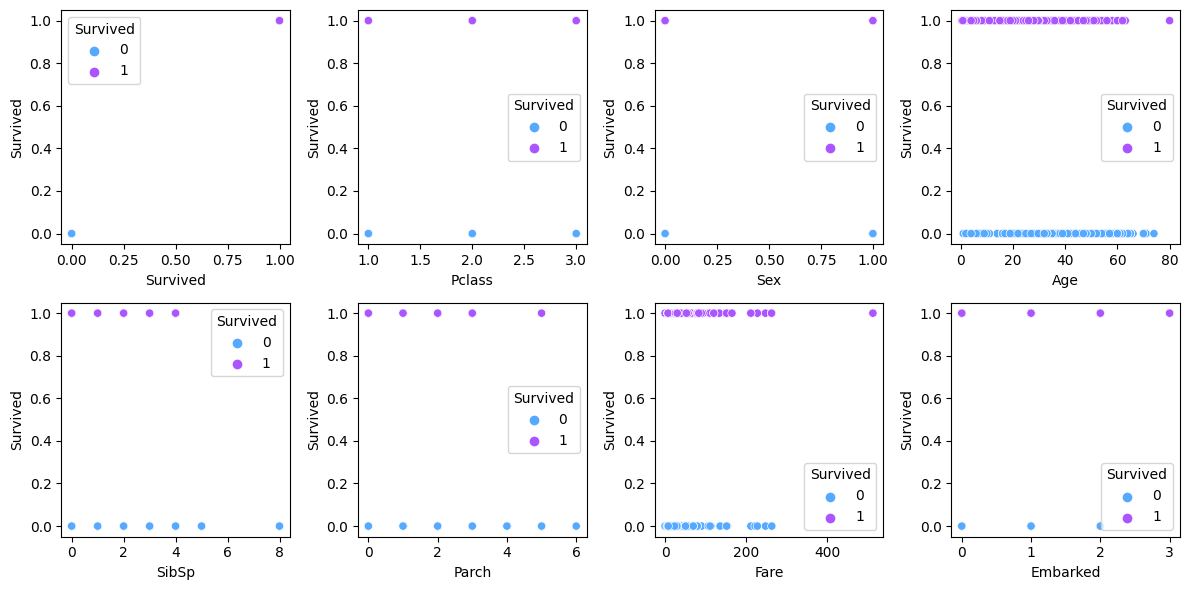

In [132]:
mp.figure(figsize=(12,6))
pnum = 1

for index in df_raw_titanic.columns.to_list():
  if(pnum<=8):
    ax = mp.subplot(2,4, pnum)
    sns.scatterplot(x=df_raw_titanic[index], y =df_raw_titanic['Survived'], palette ='cool', hue =df_raw_titanic['Survived'])
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Stripplot & Scatter plot indicates no correlation among the survived & other columns

**Multivariate Analysis**

<Axes: >

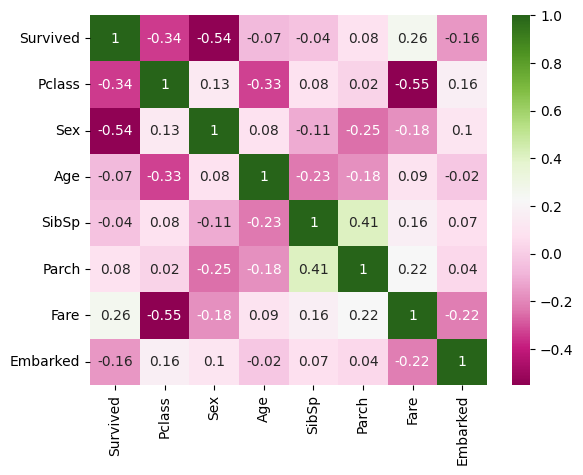

In [133]:
sns.heatmap(round(df_raw_titanic.corr(),2), cmap = 'PiYG', annot = True)

Not so much correlated values concluded from bivariate & multivariate analysis

# Hanlding outliers

In [134]:
# Separateing Independent variable to check for outliers

df_features = df_raw_titanic.iloc[:,1:]
df_target = df_raw_titanic['Survived']

df_features.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
616,3,1,34.0,1,1,14.4000,2
609,1,0,40.0,0,0,153.4625,2


(820, 8)


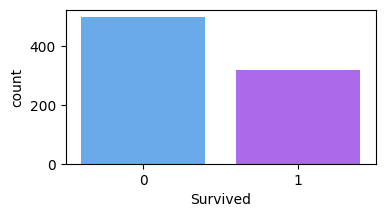

0    500
1    320
Name: Survived, dtype: int64


In [135]:
# Removing Outliers where |Z-score| > 3

df_titanic_ZS = df_raw_titanic[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print(df_titanic_ZS.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_titanic_ZS['Survived'], palette = 'cool')
mp.show()
print(df_titanic_ZS['Survived'].value_counts())

Z score method identified & ele=iminated 31 rows as Outliers

(577, 8)


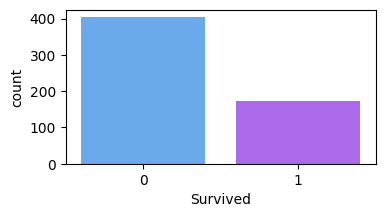

0    404
1    173
Name: Survived, dtype: int64


In [136]:
# Removing Outliers using IQR

Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

lower_bound = Q1 - (threshold * IQR)
upper_bound = Q3 + (threshold * IQR)

# Identify and remove outliers
mask = ((df_features >= lower_bound) & (df_features <= upper_bound)).all(axis=1)
df_titanic_IQR = df_raw_titanic[mask]

print(df_titanic_IQR.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_titanic_IQR['Survived'], palette = 'cool')
mp.show()
print(df_titanic_IQR['Survived'].value_counts())

IQR is eliminating lots of data considering them as outliers.

So Z score method results are used for further analysis

**Checking & handling Skewness**

In [137]:
# Checking Skewness

df_titanic_ZS.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

Acceptable limits of absolute of skewness < =2

Removing skewness from SibSp, Parch, Fare & Embarked by using cuberoot transformation

In [49]:
df_titanic_ZS['SibSp'] = np.cbrt(df_titanic_ZS['SibSp'])
df_titanic_ZS['Parch'] = np.cbrt(df_titanic_ZS['Parch'])
df_titanic_ZS['Fare'] = np.cbrt(df_titanic_ZS['Fare'])

df_titanic_ZS.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.018770
Parch       1.643259
Fare        0.708623
Embarked   -1.257511
dtype: float64

SKewness within permissible limits.

# CHECKING MULTICOLLINEARITY USING VIF

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_inp = df_titanic_ZS.drop('Survived', axis =1)
df_tar = df_titanic_ZS['Survived']

vif = pd.DataFrame()
vif['Feature'] = df_inp.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_inp.values,i) for i in range(len(df_inp.columns))]

vif

,Feature,VIF Val
0,Pclass,6.063946
1,Sex,3.178786
2,Age,5.984775
3,SibSp,1.561563
4,Parch,1.515367
5,Fare,2.455824
6,Embarked,4.590316


VIF <10, within permissible limits no need to drop any columns

# Applying SMOTE to balance the data



In [139]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=2)
X = df_inp
y = df_tar

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_titanic_bal = pd.DataFrame(data = X_resampled, columns = df_inp.columns.to_list())
df_titanic_bal['Survived'] = y_resampled

print(df_titanic_bal.shape)

df_titanic_bal.sample(4)

(820, 7)
(820,)
(1000, 7)
(1000,)
(1000, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
498,1,0,30.000000,0,0,106.4250,0,1
786,2,0,44.000000,1,0,26.0000,2,0
976,3,0,29.699118,0,0,7.8792,1,1
44,3,1,29.699118,2,0,21.6792,0,0


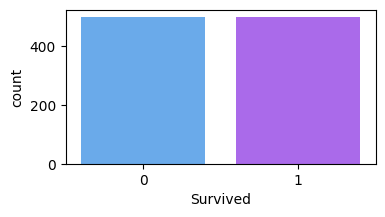

0    500
1    500
Name: Survived, dtype: int64


In [140]:
# Visualizing the balanced data using coungtplot

mp.figure(figsize=(4,2))
sns.countplot(x = df_titanic_bal['Survived'], palette = 'cool')
mp.show()
print(df_titanic_bal['Survived'].value_counts())

Dataset is now balanced

# MODELLING

In [141]:
# Separate independent & target labels

x_df = df_titanic_bal.iloc[:,:-1]
y_df = df_titanic_bal['Survived']

print(x_df.shape, y_df.shape)

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

(1000, 7) (1000,)


**Random Forest Classifier**

In [142]:
from sklearn.ensemble import RandomForestClassifier

max_acc = 0
max_rand_st = 0
RFC = RandomForestClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 10 with accuracy score: 0.88


**Adasboost Classifer**

In [143]:
from sklearn.ensemble import AdaBoostClassifier

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 48 with accuracy score: 0.868


**Gradient Boost Classifier**

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

max_acc = 0
max_rand_st = 0
GBC = GradientBoostingClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  GBC.fit(x_train, y_train)
  pred = GBC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 85 with accuracy score: 0.892


**Extra Trees**

In [146]:
from sklearn.tree import ExtraTreeClassifier

max_acc = 0
max_rand_st = 0
ETC = ExtraTreeClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 75 with accuracy score: 0.86


**Decision Tree**

In [147]:
from sklearn.tree import DecisionTreeClassifier

max_acc = 0
max_rand_st = 0
DTC = DecisionTreeClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 47 with accuracy score: 0.864


**KNN**

In [149]:
from sklearn.neighbors import KNeighborsClassifier

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 89 with accuracy score: 0.796


**SVC**

In [150]:
from sklearn.svm import SVC

max_acc = 0
max_rand_st = 0
SV = SVC()

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.25)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 51 with accuracy score: 0.72


Summary

Gradient boost gave max accuracy 0.892

RandomForest gave accuracy of 0.884

KNN & SVC gave least accuracy 0.796 & 0.72 respectively (Discarding)

Adaboost, Gradientboost, DCT, Extratrees gave accuracy in range of 0.84 - 0.88

# CV Scores

In [97]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [RFC, ETC, DTC, GBC, ABC, KNN]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', cvs.mean() )
  cv_score_list.append(cvs.mean())

RandomForestClassifier() : Avg CV Score is  0.829
ExtraTreeClassifier() : Avg CV Score is  0.7849999999999999
DecisionTreeClassifier() : Avg CV Score is  0.807
GradientBoostingClassifier() : Avg CV Score is  0.8300000000000001
AdaBoostClassifier() : Avg CV Score is  0.8
KNeighborsClassifier() : Avg CV Score is  0.8039999999999999


On basis of accuracy sccore & cv score, Gradient Boost at random state =85 can be considered as best performing model

# Training & Checking the best Model


In [153]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 85, test_size = 0.25)

GB = GradientBoostingClassifier()

GB.fit(x_train, y_train)
pred = GB.predict(x_test)
acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.892


Confusion Matrix: 
 [[113  13]
 [ 14 110]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       126
           1       0.89      0.89      0.89       124

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250






**AUC-ROC Curve**



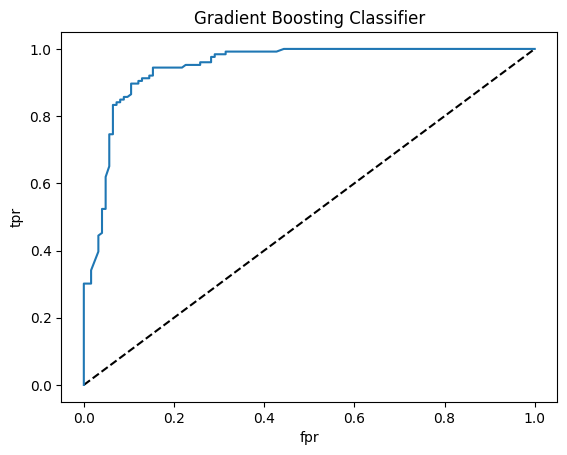

In [154]:
# Checking AUC & ROC

y_pred_prob = GB.predict_proba(x_test)[:, 0]

# Survived = 0

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Gradient Boosting Classifier')
mp.plot(fpr,tpr)
mp.show()

# SAVING THE BEST MODEL

In [155]:
import joblib

# Saving the Grzdient Boosting  Model

joblib.dump(GB, 'GB_Titanic_Survivor.pkl')

['GB_Titanic_Survivor.pkl']

# Checking the Predictions

In [156]:
# Load the saved model

load_GB_Titanic_Survivor = joblib.load('GB_Titanic_Survivor.pkl')

LGB = load_GB_Titanic_Survivor

In [157]:
# Function to predict Survivor or not

def pred_survivor(input):
  inp = np.array(input)
  is_survivor  =  LGB.predict(inp.reshape(1, -1))

  if (is_survivor == 1):
    print('Survived')

  else:
    print('Not Survived')

  return is_survivor

In [162]:
# Testing the function & Predictions

df_titanic_bal.sample(6)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
354,3,1,29.699118,0,0,7.7292,1,0
813,2,1,28.000000,0,0,10.5000,2,0
623,1,0,29.699118,1,0,52.0000,2,1
238,1,1,52.000000,1,1,79.6500,2,0
488,2,0,50.000000,0,0,10.5000,2,1
692,3,1,6.000000,0,1,12.4750,2,1


In [163]:
ts_ip1 = [3, 1, 29.7, 0, 0, 7.73, 1]
ts_ip2 = [2, 1, 28.0, 0, 0, 90.00, 2]
ts_ip3 = [1, 0, 29.7, 1, 0, 23.63, 2]
ts_ip4 = [1, 1, 52.0, 1, 1, 7.05, 2]
ts_ip5 = [2, 0, 50.0, 0, 0, 52.55, 2]
ts_ip6 = [3, 1, 6.0,  0, 1, 26.71, 2]

print("Input ts_ip1", pred_survivor(ts_ip1), "\n")
print("Input ts_ip2", pred_survivor(ts_ip2), "\n")
print("Input ts_ip3", pred_survivor(ts_ip3), "\n")
print("Input ts_ip4", pred_survivor(ts_ip4), "\n")
print("Input ts_ip5", pred_survivor(ts_ip5), "\n")
print("Input ts_ip6", pred_survivor(ts_ip6), "\n")

Not Survived
Input ts_ip1 [0] 

Not Survived
Input ts_ip2 [0] 

Survived
Input ts_ip3 [1] 

Not Survived
Input ts_ip4 [0] 

Survived
Input ts_ip5 [1] 

Survived
Input ts_ip6 [1] 



**MODEL has been tested & it is performing well**